In [ ]:
# %lsmagic
# %env
# %time
# %%timeit

### Imports & settings

In [30]:
%matplotlib inline
%env
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import math
from sklearn.neighbors import KNeighborsClassifier as KNNCLF
from sklearn.neighbors import KNeighborsRegressor as KNNREG
from sklearn.preprocessing import Normalizer as normalizer
from sklearn.model_selection import cross_val_score as cross_val
from sklearn.model_selection import train_test_split as tt_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from scipy import stats
from sklearn.feature_selection import RFE

### Data import and NaN removal

In [38]:
%env
Crimes = pd.read_csv('DataScience/crime.csv')
Crimes = Crimes[np.isfinite(Crimes['Police_Districts'])]
Crimes = Crimes[np.isfinite(Crimes['UCR_General'])]
CrimesData = Crimes.as_matrix()
datainit = CrimesData[:,[10,2,5,8,12,13]]

In [5]:
Crimes

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 12:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532
5,17,1,2015-04-25 12:50:00,2015-04-25,12:50:00,12,201517017705,800 BLOCK S BROAD ST,600.0,Thefts,13.0,2015-04,-75.166412,39.940070
6,23,K,2009-02-10 02:33:00,2009-02-10,14:33:00,14,200923006310,2200 BLOCK RIDGE AVE,800.0,Other Assaults,16.0,2009-02,-75.171149,39.979586
12,22,3,2015-10-06 06:18:00,2015-10-06,18:18:00,18,201522089374,1500 BLOCK N 15TH ST,600.0,Thefts,16.0,2015-10,-75.160229,39.976134
13,22,3,2015-10-09 12:49:00,2015-10-09,00:49:00,0,201522090172,1500 BLOCK N 17TH ST,600.0,Thefts,16.0,2015-10,-75.163073,39.977872
15,2,1,2015-11-30 08:39:00,2015-11-30,08:39:00,8,201502076521,6500 BLOCK CASTOR AV,600.0,Thefts,2.0,2015-11,-75.075602,40.041270
18,24,2,2015-04-11 05:38:00,2015-04-11,17:38:00,17,201524030846,2800 BLOCK RUTH ST,2400.0,Disorderly Conduct,17.0,2015-04,-75.122057,39.990907
21,22,4,2015-12-10 12:29:00,2015-12-10,12:29:00,12,201522110572,2600 BLOCK W THOMPSON ST,600.0,Thefts,16.0,2015-12,-75.178874,39.975724
22,15,I,2009-01-11 12:30:00,2009-01-11,12:30:00,12,200915003568,5200 BLOCK HARBISON AVE,600.0,Thefts,11.0,2009-01,-75.069032,40.012430


### Filter for certain district

In [3]:
# Having : District, Date & Crime type
District = 1;
FilterData = [x for x in CrimesData[:,[10,2,8,12,13]] if x[0] == District]


### Sort by date

In [18]:
from datetime import datetime
data = sorted(datainit, key = lambda row: datetime.strptime(row[1], "%Y-%m-%d %H:%M:%S"))

In [45]:
data = datainit

### Make the date an int

In [46]:
newData = []
for item in data:
    date = ''.join( [c for c in item[1] if c not in ' -:' ] )
    year = date[:4]
    month = date[4:6]
    day = date[6:8]
    hour = item[2]
    minute = date[10:12]
    item[2] = int(item[2])
    #lon = float("{0:.4f}".format(item[4]))
    #lat = float("{0:.4f}".format(item[5]))
    lon = item[4]
    lat = item[5]
    newData.append([item[0],int(year),int(month),int(day),int(hour),int(minute),lon,lat,item[3]])
data = np.array(newData)

In [9]:
np.shape(data)

(2132899, 9)

### Split - Not by random

In [47]:
#norm = normalizer()

#X_train, X_test, y_train, y_test = tt_split(data[:,[0,2,3,4,5,6,7]], data[:,8], test_size=0.4, random_state=1)
#X_train_norm = norm.fit_transform(X_train)
#X_test = X_test.flatten()
#y_train_norm = norm.fit_transform(y_train)
#y_test = y_test.flatten()

dLength = np.shape(data)[0]

trainSize = int(dLength*0.80)

X_train = norm.fit_transform(data[:trainSize,[2,3,4,5,6,7]])
y_train = data[:trainSize,8]
X_test = norm.fit_transform(data[trainSize:,[2,3,4,5,6,7]])
y_test = data[trainSize:,8]
len(y_train)

1706319

In [11]:
np.shape(X_train)

(1706319, 7)

In [34]:
estimator = MLPClassifier(alpha=1e-5, activation='logistic', hidden_layer_sizes=(5,3), learning_rate_init=0.01, early_stopping=True)
selector = RFE(estimator).fit(X_train, y_train)
selector.ranking_

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [ ]:
np.shape(X_train)

### PCA

In [36]:
variance = []
pca = PCA(n_components=6).fit(X_train)
transformed_data = pca.transform(X_train)
variance = pca.explained_variance_ratio_


cumsum_variance = np.cumsum(variance)
axis = range(len(variance))
axis = [x+1 for x in axis]
df = pd.DataFrame(index = axis)
df['% of Variance'] = variance
df['Cumsum % of Variance'] = cumsum_variance
#np.round(df[::20], decimals=3)

df

,% of Variance,Cumsum % of Variance
1,0.665706,0.665706
2,0.186683,0.852389
3,0.115049,0.967439
4,0.028176,0.995615
5,0.004375,0.999990
6,0.000010,1.000000


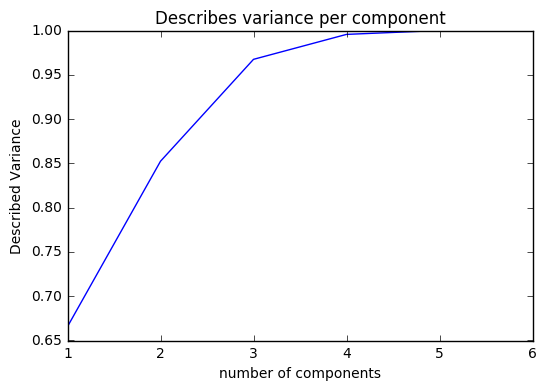

In [37]:
fig = plt.figure()
plt.title("Describes variance per component")
plt.xlabel('number of components')
plt.ylabel('Described Variance')
plt.plot(axis,cumsum_variance)
fig.savefig('PCA_plot.png')
plt.show()

## KNN Classification

### Find best k

In [110]:
len(y_test)

46300

In [ ]:
#rule of thumb: squreroot(37000)=192
#242
#52!!
scores = []
k = range(40,60)
y_real = [x for x in y_test]
for x in k:
    knn = KNNCLF(n_neighbors=x, n_jobs=-1, weights='distance')
    y = [x for x in y_train]
    y_ = knn.fit(X_train,y)
    scores.append(y_.score(X_test, y_real))

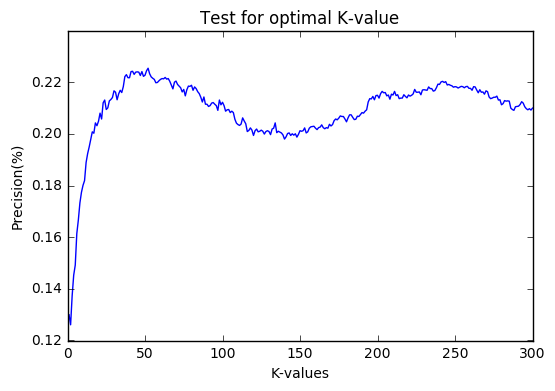

In [206]:
fig = plt.figure()
plt.title("Test for optimal K-value")
plt.xlabel('K-values')
plt.ylabel('Precision(%)')
plt.plot(k,scores)
fig.savefig('bestK.png')
plt.show()

### Init KNN with best k

In [29]:
X_predict = X_test
y_real = [x for x in y_test]
X = X_train
y = [x for x in y_train]
knn = KNNCLF(n_neighbors=52, n_jobs=-1, weights='distance')
y_ = knn.fit(X,y)

### Prediction

In [32]:
y_predict = y_.predict(X_predict)
y_predict

array([  500.,  1400.,   600., ...,  2600.,  2600.,  2600.])

### Probability of the predicted value to be true

In [231]:
y_proba_predict = y_.predict_proba(X_predict)
y_proba = [max(x) for x in y_proba_predict]
np.mean(y_proba)

0.2510835283849725

### Score of how good the model is

In [30]:
y_.score(X_predict, y_real)

0.25736321440292559

### Confusion Metric

In [148]:
confusion_matrix(y_real, y_predict)

array([[  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   2],
       [  0,   0,   3,   1,   1,  15,   3,   8,   0,   0,   1,   0,   0,
          8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  10],
       [  0,   0,  10,  12,  14, 123,   6,  42,   0,   0,   2,   0,   0,
         36,   0,   0,   0,   6,   0,   0,   1,   0,   0,   0,   0,  59],
       [  0,   0,  17,  19,  10, 147,   7,  59,   0,   0,   7,   0,   0,
         32,   0,   0,   0,  14,   0,   0,   2,   0,   0,   1,   0, 103],
       [  0,   0,  14,  18,   6, 162,   9,  40,   0,   1,   4,   0,   0,
         51,   0,   0,   0,  13,   0,   0,   2,   0,   0,   2,   0,  86],
       [  0,   0,  54,  85,  77, 852,  63, 266,   0,   0,  31,   0,   0,
        241,   3,   0,   0,  56,   0,   1,   6,   2,   0,   2,   1, 468],
       [  0,   0,   7,   9,  19, 147,   9,  39,   0,   0,   3,   0,   0,
         49,   0,   0,   1,   4,   0,   0,   

### Heatmap

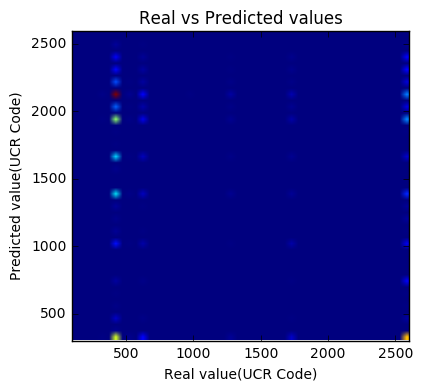

In [33]:
heatmap, xedges, yedges = np.histogram2d(y_real, y_predict, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig = plt.figure()
plt.clf()
plt.title("Real vs Predicted values")
plt.xlabel('Real value(UCR Code)')
plt.ylabel('Predicted value(UCR Code)')
plt.imshow(heatmap, extent=extent)
fig.savefig('HeatMap.png')
plt.show()

### Scatter plot showing the real values and the predicted values

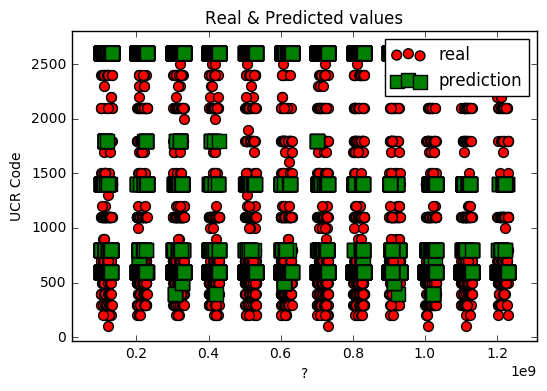

In [13]:
plt.subplot(111)
plt.title("Real & Predicted values")
plt.xlabel('?')
plt.ylabel('UCR Code')
plt.scatter(X_predict, y_real, marker='.', c='r', s=200, label='real')
plt.scatter(X_predict, y_predict, marker=',',c='g', s=100, label='prediction')
plt.axis('tight')
plt.legend()

plt.show()

### 10-fold Cross Validation KNN

In [49]:
knnscores = cross_val(knn, X_train, [x for x in y_train], cv=10)
knnciRaw = stats.norm.interval(0.95, loc=knnscores.mean(), scale=knnscores.std())
knnci = knnciRaw[1]-knnciRaw[0]
knnscoreMean = knnscores.mean()

Knn with k = 52 and use of all parameter except year yields 26.4% +- 4.1%

In [51]:
print('%0.003f +- %0.003f' % (knnscoreMean,knnci))

0.264 +- 0.041


In [162]:
knnscores.mean()

0.18241722556772805

### Silhuette analysis

In [ ]:
range_n_clusters = [13, 14, 15, 16, 17]
silhouette_avg = []

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(data[:,[1,2]])

    silhouette_avg.append(silhouette_score(data[:,[1,2]], cluster_labels))

plt.plot(range_n_clusters,silhouette_avg)
plt.show()

### ANN

In [9]:
np.shape(X_train)

(1706319, 7)

28,37% (5,3)

In [53]:
scores = []
for n in range(1,50):
    clf = MLPClassifier(alpha=1e-5, activation='logistic', hidden_layer_sizes=(n), learning_rate_init=0.01, early_stopping=True)
    clf.fit(X_train, y_train)
    #y_predict = clf.predict(X_test_norm)
    scores.append(clf.score(X_test, y_test))
scores

0.28065544563739508

In [50]:
clf.n_layers_

3

In [51]:
clf.hidden_layer_sizes

5

### 10-fold cross validation ANN

In [44]:
clf = MLPClassifier(alpha=1e-5, activation='logistic')
annscores = cross_val(clf, X_train, [x for x in y_train], cv=10)
annciRaw = stats.norm.interval(0.95, loc=annscores.mean(), scale=annscores.std())
annci = annciRaw[1]-annciRaw[0]
annscoreMean = annscores.mean()

In [58]:
annciRaw = ciRaw
annci = ci
annscoreMean = scoreMean

In [59]:
print('%0.003f +- %0.003f' % (annscoreMean,annci))

0.277 +- 0.036


Ann with use of all parameter except year yields 27.7% +- 3.6%

### Bar plot with error bars

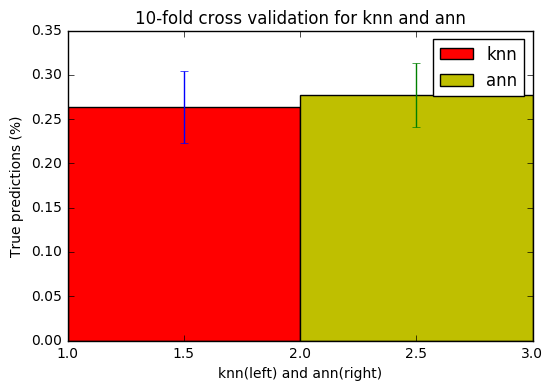

In [64]:
fig, ax = plt.subplots()
knnBar = ax.bar(1, knnscores.mean(), width, color='r', yerr=knnci)
annBar = ax.bar(2, annscores.mean(), width, color='y', yerr=annci)

ax.set_ylabel('True predictions (%)')
ax.set_title('10-fold cross validation for knn and ann')
ax.set_xlabel('knn(left) and ann(right)')

ax.legend((knnBar[0], annBar[0]), ('knn', 'ann'))

fig.savefig('knn and ann bar plot with errors (k = 52) year not in features vector')

plt.show()